In [227]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\cancer_classification.csv")

In [11]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
data.shape

(569, 31)

# finding the null value

In [19]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

# find data types informations 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# check the duplicates value

In [34]:
data.duplicated().sum()

0

# check all plot normal  distributions 

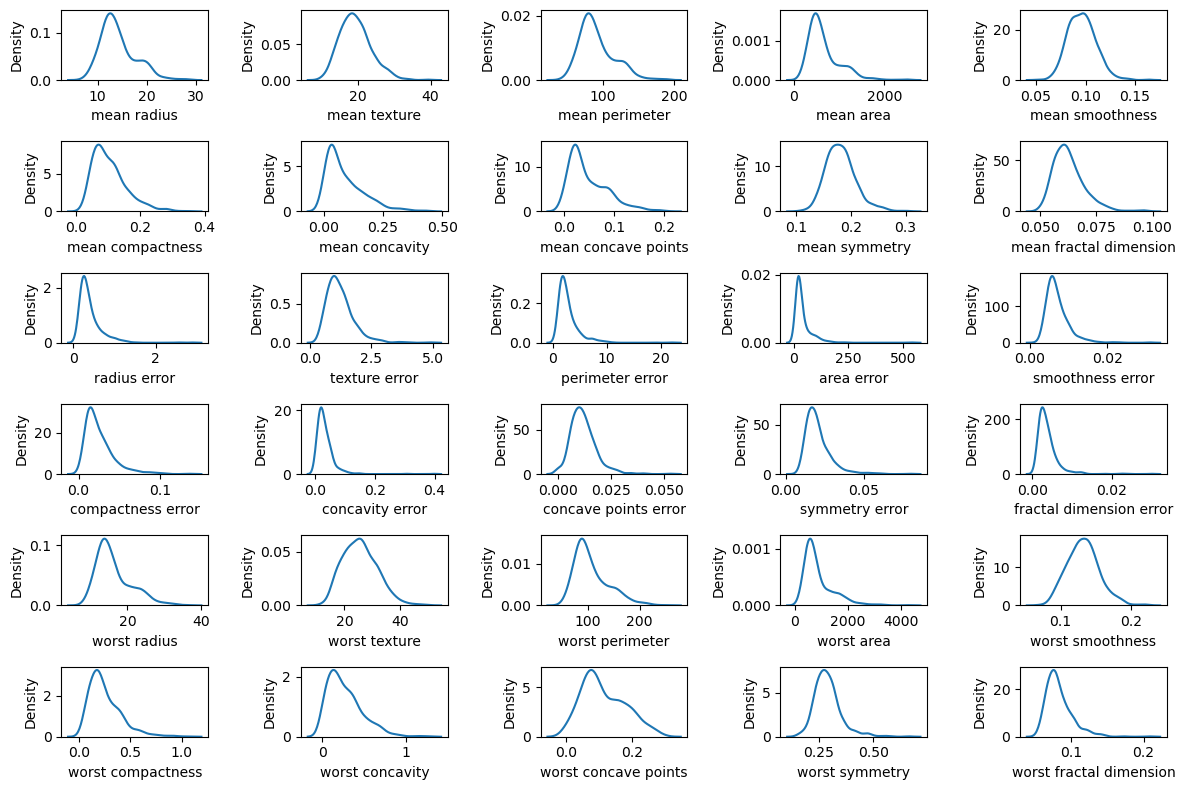

In [84]:
features = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
     "mean smoothness",
     "mean compactness",
     "mean concavity",
     "mean concave points",
     "mean symmetry",
     "mean fractal dimension",
     "radius error",
     "texture error",
     "perimeter error",
     "area error",
     "smoothness error",
     "compactness error",
     "concavity error",
     "concave points error",
     "symmetry error",
     "fractal dimension error",
     "worst radius",
     "worst texture",
     "worst perimeter",
     "worst area",
     "worst smoothness",
     "worst compactness",
     "worst concavity",
     "worst concave points",
     "worst symmetry",
     "worst fractal dimension"
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(features):
    plt.subplot(6, 5, i+1)
    sns.kdeplot(data[col])
   
    



plt.tight_layout()
plt.show()

# all distributions  plot find outliers

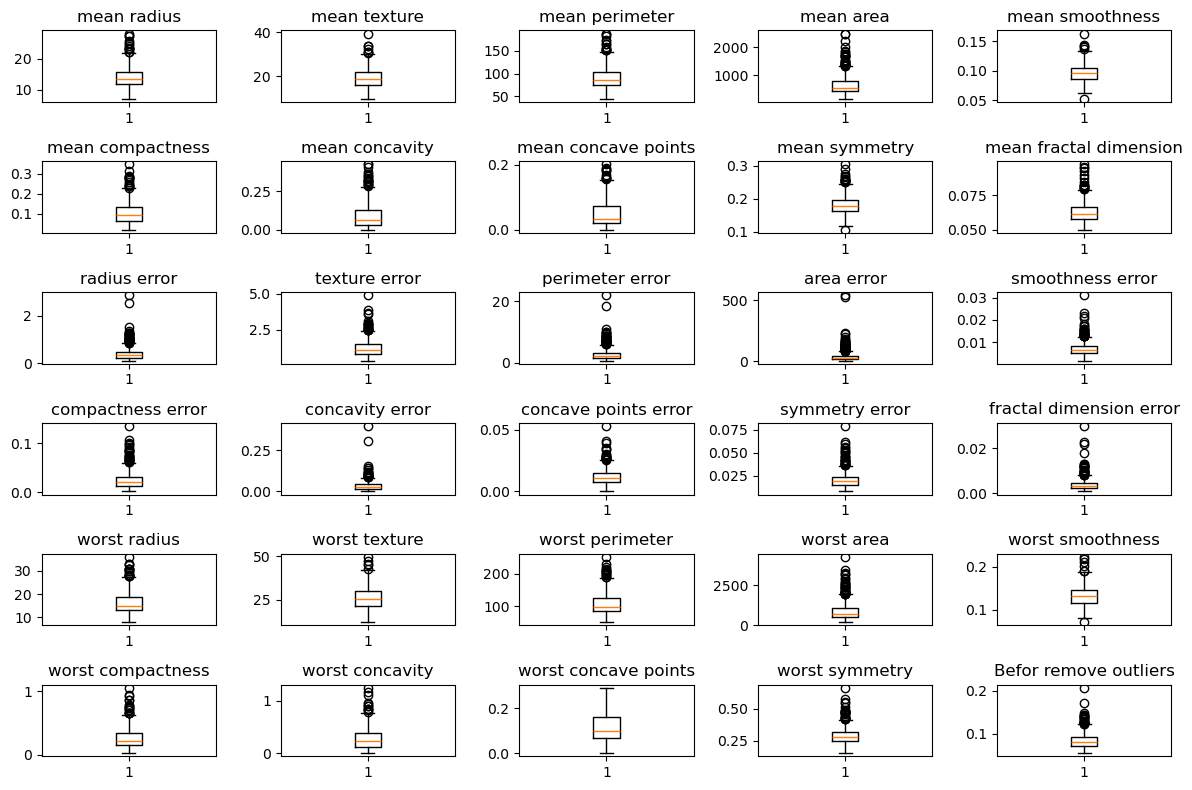

In [88]:
# befor remove the outliers 
features = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
     "mean smoothness",
     "mean compactness",
     "mean concavity",
     "mean concave points",
     "mean symmetry",
     "mean fractal dimension",
     "radius error",
     "texture error",
     "perimeter error",
     "area error",
     "smoothness error",
     "compactness error",
     "concavity error",
     "concave points error",
     "symmetry error",
     "fractal dimension error",
     "worst radius",
     "worst texture",
     "worst perimeter",
     "worst area",
     "worst smoothness",
     "worst compactness",
     "worst concavity",
     "worst concave points",
     "worst symmetry",
     "worst fractal dimension"
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(features):
    plt.subplot(6, 5, i+1)
    plt.boxplot(data[col])
    plt.title(col)
    


plt.title("Befor remove outliers")
plt.tight_layout()
plt.show()

# remove outliers 

In [157]:
features = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
     "mean smoothness",
     "mean compactness",
     "mean concavity",
     "mean concave points",
     "mean symmetry",
     "mean fractal dimension",
     "radius error",
     "texture error",
     "perimeter error",
     "area error",
     "smoothness error",
     "compactness error",
     "concavity error",
     "concave points error",
     "symmetry error",
     "fractal dimension error",
     "worst radius",
     "worst texture",
     "worst perimeter",
     "worst area",
     "worst smoothness",
     "worst compactness",
     "worst concavity",
     "worst concave points",
     "worst symmetry",
     "worst fractal dimension"]
data_capped = data.copy()

for  col in (features):
    mean=data[col].mean()
    std=data[col].std()
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    new_data=data[(data[col]>upper_limit) | (data[col]<lower_limit)]

    # cappind the data 
    data_capped[col] = np.where(
        data[col] > upper_limit,
        upper_limit,
        np.where(
            data[col] < lower_limit,
            lower_limit,
            data[col]
        )
    )
    new_data=data[(data_capped[col]>upper_limit) | (data_capped[col]<lower_limit)]
    
   



In [159]:
new_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1


In [161]:
data_capped

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.118400,0.262779,0.300100,0.14710,0.2419,0.078710,...,17.33,184.60,2019.0,0.162200,0.665600,0.711900,0.2654,0.460100,0.11890,0
1,20.57,17.77,132.90,1326.0,0.084740,0.078640,0.086900,0.07017,0.1812,0.056670,...,23.41,158.80,1956.0,0.123800,0.186600,0.241600,0.1860,0.275000,0.08902,0
2,19.69,21.25,130.00,1203.0,0.109600,0.159900,0.197400,0.12790,0.2069,0.059990,...,25.53,152.50,1709.0,0.144400,0.424500,0.450400,0.2430,0.361300,0.08758,0
3,11.42,20.38,77.58,386.1,0.138553,0.262779,0.241400,0.10520,0.2597,0.083979,...,26.50,98.87,567.7,0.200866,0.726275,0.686900,0.2575,0.475678,0.13813,0
4,20.29,14.34,135.10,1297.0,0.100300,0.132800,0.198000,0.10430,0.1809,0.058830,...,16.67,152.20,1575.0,0.137400,0.205000,0.400000,0.1625,0.236400,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.111000,0.115900,0.243900,0.13890,0.1726,0.056230,...,26.40,166.10,2027.0,0.141000,0.211300,0.410700,0.2216,0.206000,0.07115,0
565,20.13,28.25,131.20,1261.0,0.097800,0.103400,0.144000,0.09791,0.1752,0.055330,...,38.25,155.00,1731.0,0.116600,0.192200,0.321500,0.1628,0.257200,0.06637,0
566,16.60,28.08,108.30,858.1,0.084550,0.102300,0.092510,0.05302,0.1590,0.056480,...,34.12,126.70,1124.0,0.113900,0.309400,0.340300,0.1418,0.221800,0.07820,0
567,20.60,29.33,140.10,1265.0,0.117800,0.262779,0.327959,0.15200,0.2397,0.070160,...,39.42,184.60,1821.0,0.165000,0.726275,0.898061,0.2650,0.408700,0.12400,0


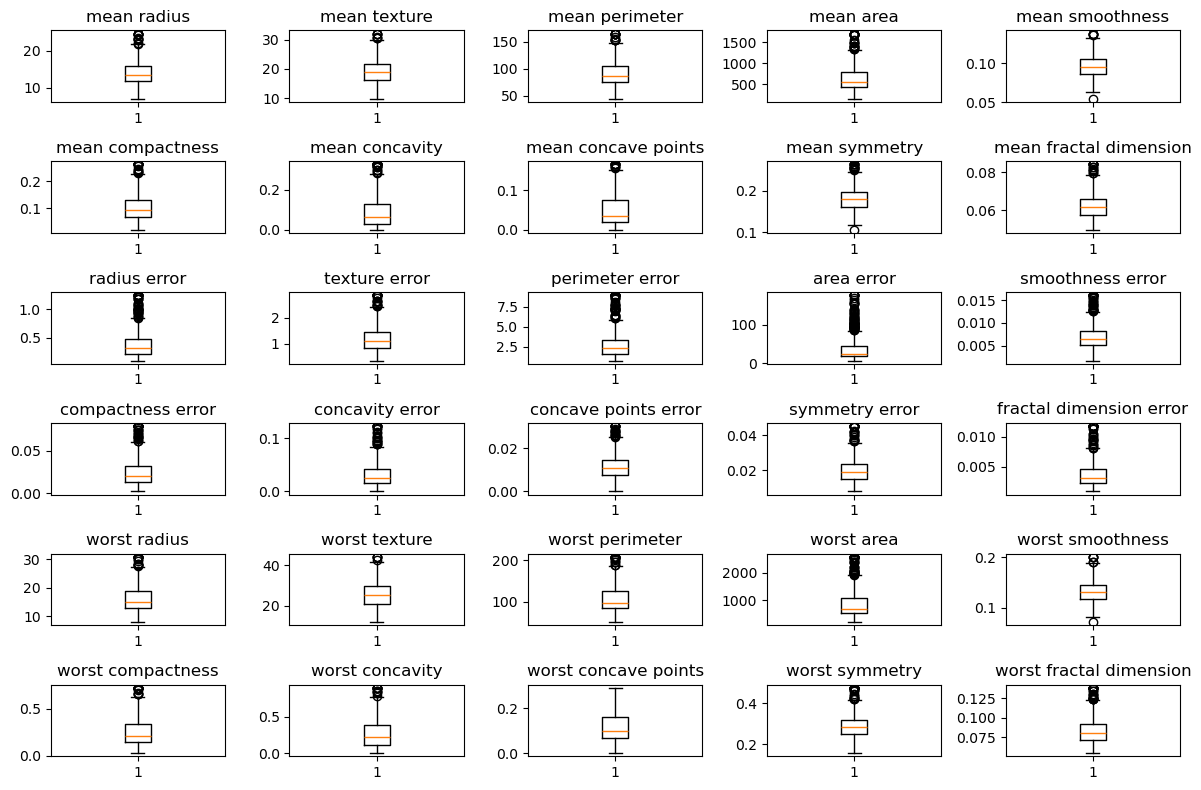

In [163]:
# after outliers remove 

features = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
     "mean smoothness",
     "mean compactness",
     "mean concavity",
     "mean concave points",
     "mean symmetry",
     "mean fractal dimension",
     "radius error",
     "texture error",
     "perimeter error",
     "area error",
     "smoothness error",
     "compactness error",
     "concavity error",
     "concave points error",
     "symmetry error",
     "fractal dimension error",
     "worst radius",
     "worst texture",
     "worst perimeter",
     "worst area",
     "worst smoothness",
     "worst compactness",
     "worst concavity",
     "worst concave points",
     "worst symmetry",
     "worst fractal dimension"
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(features):
    plt.subplot(6, 5, i+1)
    plt.boxplot(data_capped[col])
    plt.title(col)
plt.tight_layout()
plt.show()
    

In [183]:
# after outliers remove 

features = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
     "mean smoothness",
     "mean compactness",
     "mean concavity",
     "mean concave points",
     "mean symmetry",
     "mean fractal dimension",
     "radius error",
     "texture error",
     "perimeter error",
     "area error",
     "smoothness error",
     "compactness error",
     "concavity error",
     "concave points error",
     "symmetry error",
     "fractal dimension error",
     "worst radius",
     "worst texture",
     "worst perimeter",
     "worst area",
     "worst smoothness",
     "worst compactness",
     "worst concavity",
     "worst concave points",
     "worst symmetry",
     "worst fractal dimension"
]



for col in features:
    new_des=data_capped[col].describe()
    print(new_des)
  

count    569.000000
mean      14.109361
std        3.462910
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       24.699438
Name: mean radius, dtype: float64
count    569.000000
mean      19.271460
std        4.234610
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       32.192756
Name: mean texture, dtype: float64
count    569.000000
mean      91.826963
std       23.813337
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      164.865977
Name: mean perimeter, dtype: float64
count     569.000000
mean      649.964766
std       332.345102
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      1710.631491
Name: mean area, dtype: float64
count    569.000000
mean       0.096299
std        0.013820
min        0.054168
25%        0.086370
50%        0.095870
75%        0.105300
max        0.138553
Name: mean smoothness, dtype: float64
count    569.000

In [190]:
data_capped

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.118400,0.262779,0.300100,0.14710,0.2419,0.078710,...,17.33,184.60,2019.0,0.162200,0.665600,0.711900,0.2654,0.460100,0.11890,0
1,20.57,17.77,132.90,1326.0,0.084740,0.078640,0.086900,0.07017,0.1812,0.056670,...,23.41,158.80,1956.0,0.123800,0.186600,0.241600,0.1860,0.275000,0.08902,0
2,19.69,21.25,130.00,1203.0,0.109600,0.159900,0.197400,0.12790,0.2069,0.059990,...,25.53,152.50,1709.0,0.144400,0.424500,0.450400,0.2430,0.361300,0.08758,0
3,11.42,20.38,77.58,386.1,0.138553,0.262779,0.241400,0.10520,0.2597,0.083979,...,26.50,98.87,567.7,0.200866,0.726275,0.686900,0.2575,0.475678,0.13813,0
4,20.29,14.34,135.10,1297.0,0.100300,0.132800,0.198000,0.10430,0.1809,0.058830,...,16.67,152.20,1575.0,0.137400,0.205000,0.400000,0.1625,0.236400,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.111000,0.115900,0.243900,0.13890,0.1726,0.056230,...,26.40,166.10,2027.0,0.141000,0.211300,0.410700,0.2216,0.206000,0.07115,0
565,20.13,28.25,131.20,1261.0,0.097800,0.103400,0.144000,0.09791,0.1752,0.055330,...,38.25,155.00,1731.0,0.116600,0.192200,0.321500,0.1628,0.257200,0.06637,0
566,16.60,28.08,108.30,858.1,0.084550,0.102300,0.092510,0.05302,0.1590,0.056480,...,34.12,126.70,1124.0,0.113900,0.309400,0.340300,0.1418,0.221800,0.07820,0
567,20.60,29.33,140.10,1265.0,0.117800,0.262779,0.327959,0.15200,0.2397,0.070160,...,39.42,184.60,1821.0,0.165000,0.726275,0.898061,0.2650,0.408700,0.12400,0


In [192]:
x=data_capped.drop(columns=["benign_0__mal_1"])
y=data_capped["benign_0__mal_1"]

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [198]:
l=LogisticRegression()

In [200]:
l.fit(x_train,y_train)

C:\Users\mdfir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [204]:
pred=l.predict(x_test)

In [210]:
# accuracy
a_score=accuracy_score(y_test,pred)
a_score

0.956140350877193

In [252]:
# recall_score 
r_score=recall_score(y_test,pred,average=None)
print(f"all binary recall_score :{r_score}")
r_score=recall_score(y_test,pred,average="micro")
print(f"the total recall score micro:{r_score}" )
r_score=recall_score(y_test,pred,average="weighted")
print(f"the total recall score weight:{r_score}" )
r_score=recall_score(y_test,pred)
print(f"the total recall score simple:{r_score}" )


all binary recall_score :[0.90697674 0.98591549]
the total recall score micro:0.956140350877193
the total recall score weight:0.956140350877193
the total recall score simple:0.9859154929577465


# confusion matrix 

In [219]:
c_matrix=confusion_matrix(y_test,pred)

In [221]:
c_matrix

array([[39,  4],
       [ 1, 70]], dtype=int64)

In [223]:
# precision_score
p_score=precision_score(y_test,pred)

In [225]:
p_score

0.9459459459459459

In [229]:
f1_score=f1_score(y_test,pred)

In [231]:
f1_score

0.9655172413793104